### Comparison Analysis - Using Particle in Equilibrium
Compare the particle's PDF when just affected by the brownian motion of the bath, and the trap, to the one affected by our system.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.stats import norm

tot_time = 180
t_stat = 10 # We suppose at this time the system got into an stationary state
tot_runs = 100
fmag = 7.2

# Extract Relevant Data from Sample
dir_sample = r"./mag&freq/" + r"/data_fmag1_ffreq3_2runs/" + "results.csv"
sample = pd.read_csv(dir_sample)
tot_frames = len(sample["frame"].tolist())/2
time_per_frame = tot_time / tot_frames
time_array = np.linspace(0, int(tot_time), int(tot_frames))

# General data for stationary analysis
t_stat_idx = np.argmin(np.abs(time_array - t_stat))
n_data = len(time_array[t_stat_idx:-1])

Import the data of the particle in equilibrium

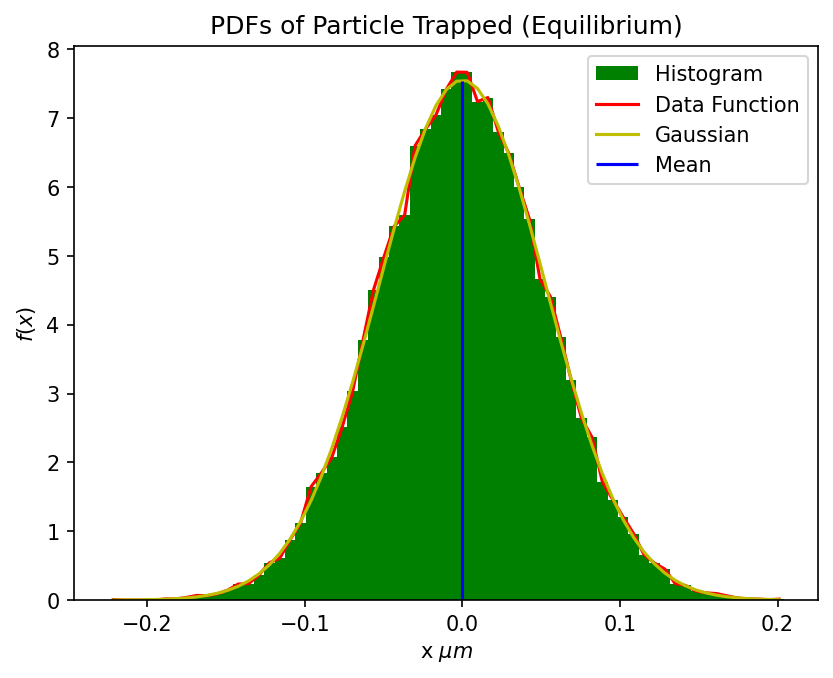

Mean ($\mu$): -0.0
Standard Deviation ($\sigma$): 0.05


In [6]:
dir_eq = r"./results/single_particle_test.csv"
data_eq = pd.read_csv(dir_eq)

# Get the x_array for equilibrium
test = data_eq[data_eq["run_number"] == 1]
n_i = int(len(test.x_pos.tolist())/2)
x_eq = np.zeros(1000*n_i)

for i in range(1000):
    part = data_eq[data_eq["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    x_eq[n_i*i:(n_i*(i+1))] = x_part[n_i:-1]
    
# Get function PDFs
num_bins = 65
f_eq, bin_edges = np.histogram(x_eq, bins=num_bins, density=True)
xf_eq= 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Gaussian Function
mu_eq, std_eq = norm.fit(x_eq)
gau_eq = norm.pdf(xf_eq, mu_eq, std_eq)
    
plt.figure(dpi=150)
plt.hist(x_eq, bins=num_bins, density=True, color="g", label="Histogram")
plt.plot(xf_eq, f_eq, color="r", label="Data Function")
plt.plot(xf_eq, gau_eq, color="y", label="Gaussian")
plt.title("PDFs of Particle Trapped (Equilibrium)")
plt.vlines(x=mu_eq, ymin=0, ymax=max(gau_eq), color="b", label="Mean")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"$f(x)$")
plt.legend()
plt.show()

print(r"Mean ($\mu$):", round(mu_eq, 2))
print(r"Standard Deviation ($\sigma$):", round(std_eq, 2))

We can now use the gaussian found to compare it with the other distributions

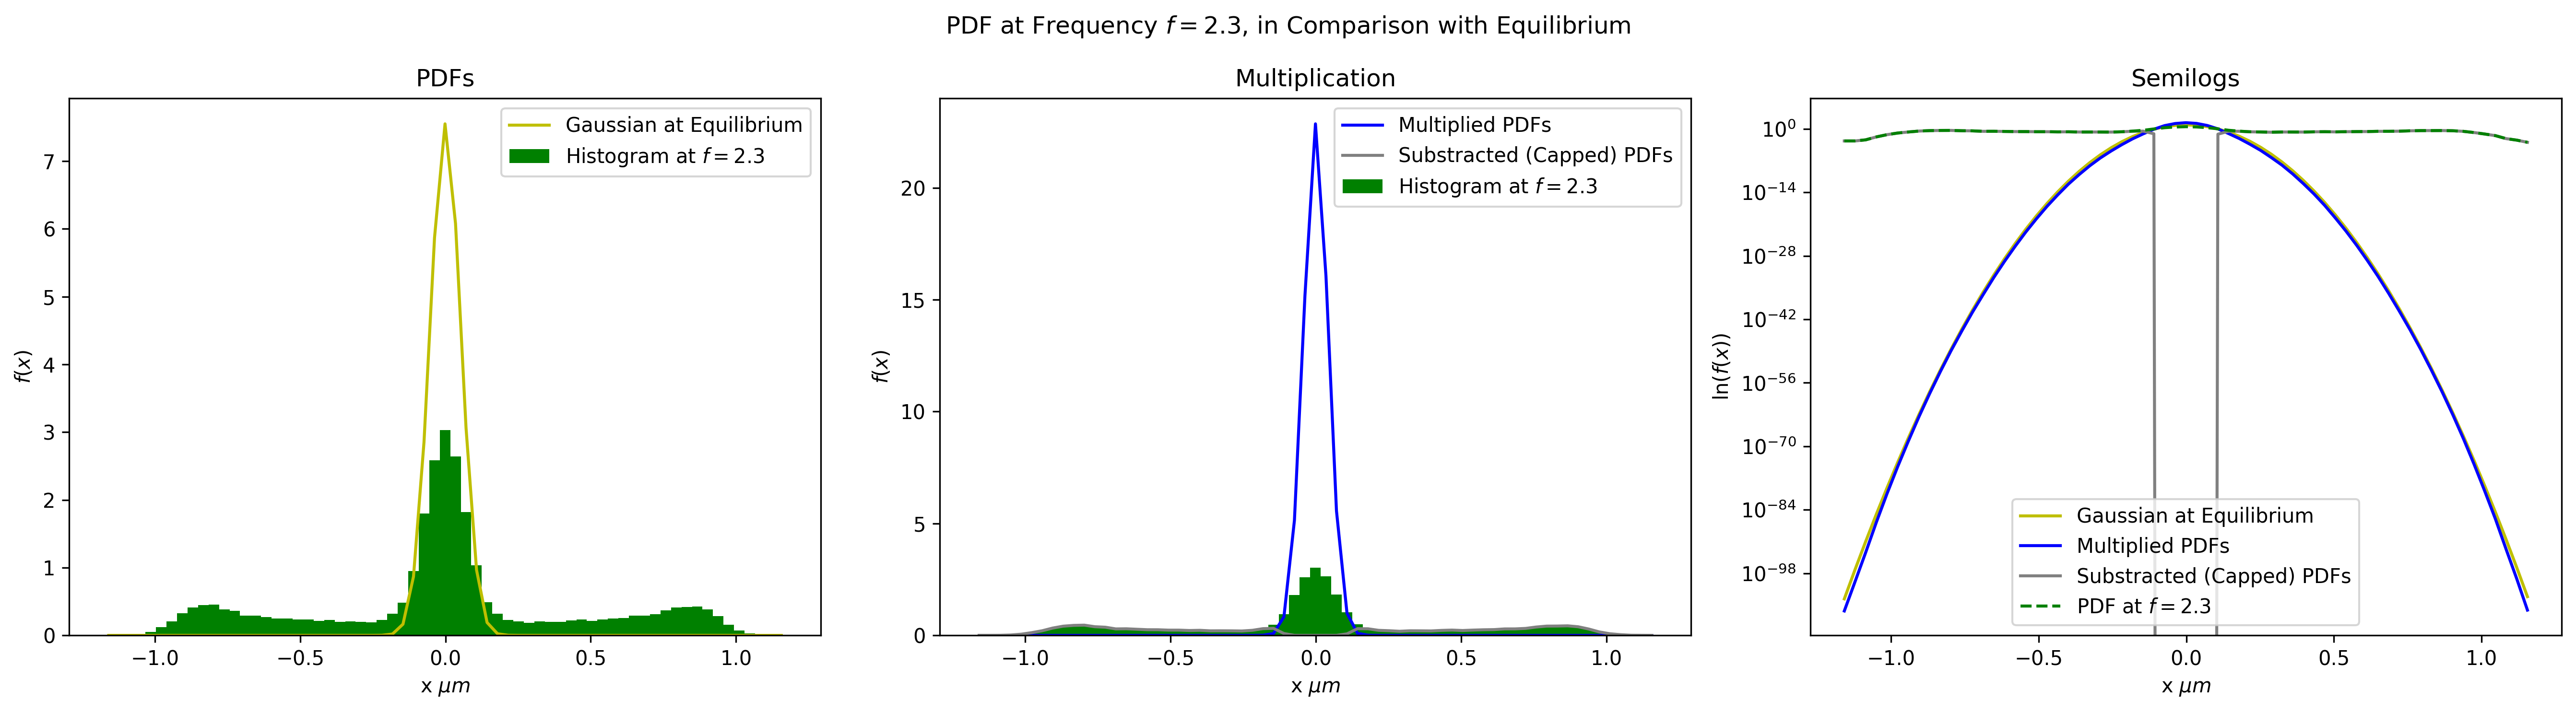

In [24]:
freq_vis = 2.3

dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq_vis}_{tot_runs}runs/" + "results.csv"
data = pd.read_csv(dir_data)
x_array = np.zeros(tot_runs * n_data)

for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    x_array[n_data * i : n_data * (i + 1)] = x_part[t_stat_idx:-1]

counts_freq, bin_edges = np.histogram(x_array, bins=num_bins, density=True)
x_freq = 0.5 * (bin_edges[1:] + bin_edges[:-1])
gau_eq = norm.pdf(x_freq, mu_eq, std_eq)
      
# Crear figura con 2 subplots horizontales
fig, axs = plt.subplots(1, 3, figsize=(18, 5), dpi=300)
fig.suptitle(fr"PDF at Frequency $f = {freq_vis}$, in Comparison with Equilibrium")

# Primer subplot - PDF normal
axs[0].plot(x_freq, gau_eq, color="y", label="Gaussian at Equilibrium")
axs[0].hist(x_array, bins=num_bins, density=True, color="g", label=fr"Histogram at $f = {freq_vis}$")
axs[0].set_xlabel(r"x $\mu{}m$")
axs[0].set_ylabel(r"$f(x)$")
axs[0].set_title("PDFs")
axs[0].legend()

# Segundo Subplot - Multiplicacion de las PDFs
merge = np.multiply(counts_freq, gau_eq)
subs = np.maximum(counts_freq - gau_eq, 0)
axs[1].plot(x_freq, merge, color="b", label=fr"Multiplied PDFs")
axs[1].plot(x_freq, subs, color="grey", label=fr"Substracted (Capped) PDFs")
axs[1].hist(x_array, bins=num_bins, density=True, color="g", label=fr"Histogram at $f = {freq_vis}$")
axs[1].set_xlabel(r"x $\mu{}m$")
axs[1].set_ylabel(r"$f(x)$")
axs[1].set_title("Multiplication")
axs[1].legend()


# Tercer Subplot - Semilog
axs[2].semilogy(x_freq, gau_eq, color="y", label="Gaussian at Equilibrium")
axs[2].semilogy(x_freq, merge, color="b", label=fr"Multiplied PDFs")
axs[2].semilogy(x_freq, subs, color="grey", label=fr"Substracted (Capped) PDFs")
axs[2].semilogy(x_freq, counts_freq, "--", color="g", label=fr"PDF at $f = {freq_vis}$")
axs[2].set_xlabel(r"x $\mu{}m$")
axs[2].set_ylabel(r"$\ln(f(x))$")
axs[2].set_title("Semilogs")
axs[2].legend()


plt.tight_layout()  # Ajuste para dejar espacio al título principal
plt.show()

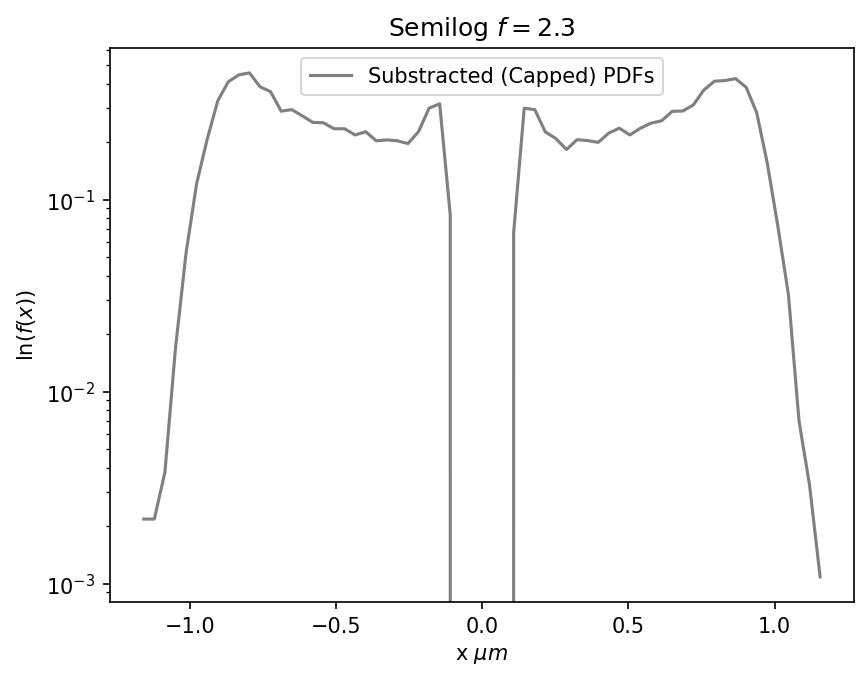

In [26]:
plt.figure(dpi=150)
plt.semilogy(x_freq, subs, color="grey", label=fr"Substracted (Capped) PDFs")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"$\ln(f(x))$")
plt.title(fr"Semilog $f = {freq_vis}$")
plt.legend()
plt.show()